In [2]:
import pandas as pd
import numpy as np


df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")
df = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()


A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
C = df[['Payment (Rs)']].to_numpy()


print("Dimensionality of vector space:", A.shape[1])
print("Number of vectors:", A.shape[0])
print("Rank of matrix A:", np.linalg.matrix_rank(A))


X = np.linalg.pinv(A) @ C
print("Cost per product (Candy, Mango, Milk):", X.flatten().round(2))


Dimensionality of vector space: 3
Number of vectors: 10
Rank of matrix A: 3
Cost per product (Candy, Mango, Milk): [ 1. 55. 18.]


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")
df = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()
df['Label'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')


X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

        POOR       1.00      1.00      1.00         1
        RICH       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [3]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")
print(df.columns.tolist())  
price_col = 'Close'   
chg_col = 'Chg%'       
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
mean_price = statistics.mean(df[price_col])
var_price = statistics.variance(df[price_col])
print("Mean of Price:", round(mean_price, 2))
print("Variance of Price:", round(var_price, 2))
wednesday_prices = df[df['Weekday'] == 'Wednesday'][price_col]
wednesday_mean = wednesday_prices.mean()
print("Wednesday Mean:", round(wednesday_mean, 2))
april_prices = df[df['Month'] == 4][price_col]
april_mean = april_prices.mean()
print("April Mean:", round(april_mean, 2))
loss_prob = (df[chg_col] < 0).mean()
print("Probability of Loss:", round(loss_prob, 3))
wed_df = df[df['Weekday'] == 'Wednesday']
profit_on_wed = (wed_df[chg_col] > 0).mean()
print("Profit on Wednesday:", round(profit_on_wed, 3))
print("Conditional Probability P(Profit | Wednesday):", round(profit_on_wed, 3))
plt.figure(figsize=(10, 5))
plt.scatter(df['Weekday'], df[chg_col], color='purple')
plt.title("Change % vs Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Chg%")
plt.grid(True)
plt.show()


['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%']


KeyError: 'Close'

In [5]:
import pandas as pd
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

print("Data types of each column:\n")
print(df.dtypes)
print("\n Encoding Suggestions:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"- {col}: One-Hot Encoding (Nominal)")
    elif df[col].dtype in ['int64', 'float64']:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) <= 10:
            print(f"- {col}: Label Encoding (Likely Ordinal)")
        else:
            print(f"- {col}: Numeric (No encoding needed)")
print("\n Data range for numeric columns:\n")
print(df.describe(include='number'))
print("\n Missing values in each column:\n")
print(df.isnull().sum())
print("\n Outlier summary (using IQR method):")
for col in df.select_dtypes(include='number').columns:
    series = df[col].dropna()
    if series.empty:
        print(f"- {col}: Skipped (no valid numeric data)")
        continue
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0:
        print(f"- {col}: Skipped (IQR = 0, all values nearly same)")
    else:
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        print(f"- {col}: {len(outliers)} outliers")


print("\n Mean and Standard Deviation for numeric columns:")
for col in df.select_dtypes(include='number').columns:
    values = df[col].dropna()
    if values.empty:
        print(f"- {col}: Skipped (all values are NaN)")
    else:
        print(f"- {col}: Mean = {values.mean():.2f}, Std = {values.std():.2f}")


🧾 Data types of each column:

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          objec

In [6]:
import pandas as pd
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

print(" Data types of each column:\n")
print(df.dtypes)


print("\nEncoding Suggestions:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"- {col}: One-Hot Encoding (Nominal)")
    elif df[col].dtype in ['int64', 'float64']:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) <= 10:
            print(f"- {col}: Label Encoding (Likely Ordinal)")
        else:
            print(f"- {col}: Numeric (No encoding needed)")


print("\n Data range for numeric columns:\n")
print(df.describe(include='number'))


print("\n Missing values in each column:\n")
print(df.isnull().sum())


print("\n Outlier summary (using IQR method):")
for col in df.select_dtypes(include='number').columns:
    series = df[col].dropna()
    if series.empty:
        print(f"- {col}: Skipped (no valid numeric data)")
        continue
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0:
        print(f"- {col}: Skipped (IQR = 0, all values nearly same)")
    else:
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        print(f"- {col}: {len(outliers)} outliers")


print("\n Mean and Standard Deviation for numeric columns:")
for col in df.select_dtypes(include='number').columns:
    values = df[col].dropna()
    if values.empty:
        print(f"- {col}: Skipped (all values are NaN)")
    else:
        print(f"- {col}: Mean = {values.mean():.2f}, Std = {values.std():.2f}")


🧾 Data types of each column:

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          objec

In [7]:
import pandas as pd


df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
binary_cols = []
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    if set(unique_vals).issubset({'t', 'f'}):
        binary_cols.append(col)

binary_df = df[binary_cols].replace({'t': 1, 'f': 0})


v1 = binary_df.iloc[0]
v2 = binary_df.iloc[1]


f11 = ((v1 == 1) & (v2 == 1)).sum()
f00 = ((v1 == 0) & (v2 == 0)).sum()
f10 = ((v1 == 1) & (v2 == 0)).sum()
f01 = ((v1 == 0) & (v2 == 1)).sum()


jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else "Undefined"

smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) > 0 else "Undefined"


print("Binary Columns Used:", binary_cols)
print("f11 (1 in both):", f11)
print("f00 (0 in both):", f00)
print("f10 (1 in v1 only):", f10)
print("f01 (1 in v2 only):", f01)
print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)


Binary Columns Used: ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
f11 (1 in both): 1
f00 (0 in both): 16
f10 (1 in v1 only): 1
f01 (1 in v2 only): 2
Jaccard Coefficient (JC): 0.25
Simple Matching Coefficient (SMC): 0.85


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from numpy import dot
from numpy.linalg import norm


df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
df = df.dropna(how='all')
df = df.fillna(0)
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
A = df.iloc[0].values
B = df.iloc[1].values
cosine_similarity = dot(A, B) / (norm(A) * norm(B))
print("Cosine Similarity between Row 1 and Row 2:", round(cosine_similarity, 4))


Cosine Similarity between Row 1 and Row 2: 1.0


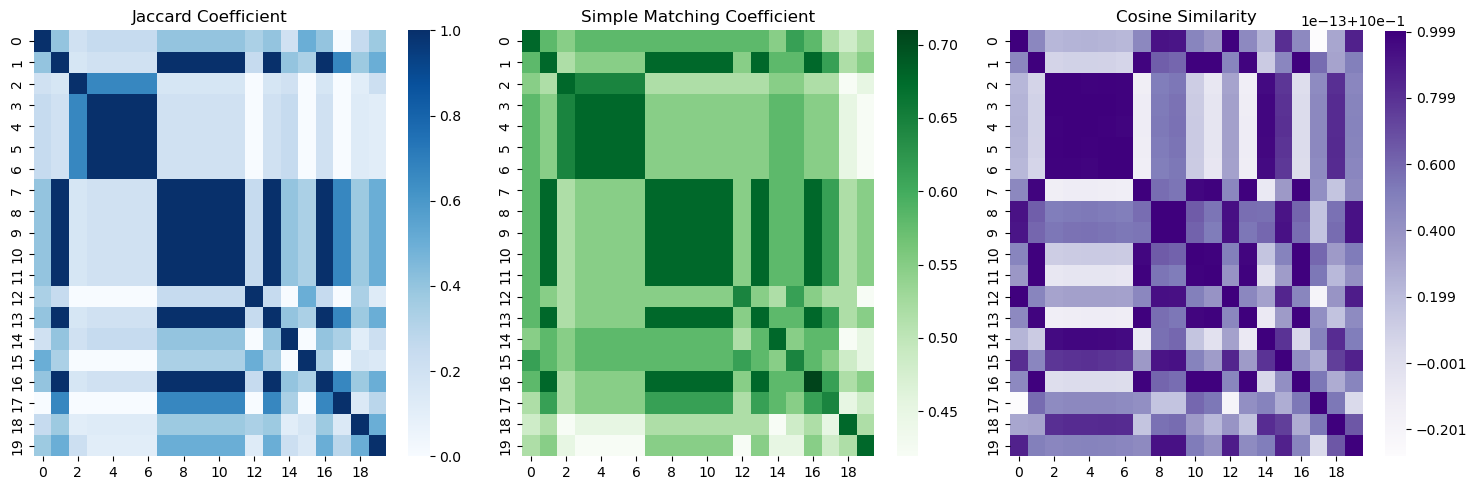

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from numpy import dot
from numpy.linalg import norm


df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
df = df.dropna(how='all').fillna(0)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df20 = df.iloc[:20]
def jaccard(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))
    denom = f11 + f10 + f01
    return f11 / denom if denom else 0

def smc(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))
    total = len(v1)
    return (f11 + f00) / total

def cosine(v1, v2):
    return dot(v1, v2) / (norm(v1) * norm(v2)) if norm(v1) * norm(v2) != 0 else 0


n = 20
JC = np.zeros((n, n))
SMC = np.zeros((n, n))
COS = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        JC[i][j] = jaccard(df20.iloc[i], df20.iloc[j])
        SMC[i][j] = smc(df20.iloc[i], df20.iloc[j])
        COS[i][j] = cosine(df20.iloc[i], df20.iloc[j])
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(JC, annot=False, cmap='Blues')
plt.title("Jaccard Coefficient")
plt.subplot(1, 3, 2)
sns.heatmap(SMC, annot=False, cmap='Greens')
plt.title("Simple Matching Coefficient")
plt.subplot(1, 3, 3)
sns.heatmap(COS, annot=False, cmap='Purples')
plt.title("Cosine Similarity")
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any()
            if outliers:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mean())

print(" Missing values have been filled appropriately.")


 Missing values have been filled appropriately.


In [7]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(" Numeric values have been normalized using Min-Max Scaling.")
print(df[numeric_cols].head()) 


 Numeric values have been normalized using Min-Max Scaling.
      Record ID       age
0  0.000000e+00  0.000427
1  3.410871e-08  0.000427
2  9.891527e-07  0.000610
3  6.934301e-05  0.000534
4  6.937712e-05  0.000473
